In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
data = pd.read_csv('muc123a.csv')
data4a = pd.read_csv("muc4a.csv")
# Display the first few rows of the DataFrame
data.head()

,tinh,huyen,xa,diaban,hoso,matv,m1ac2,m1ac3,m1ac4a,m1ac4b,m1ac5,m1ac6,m1ac7,m1ac7a,m1ac8,m1ac9,m1ac10a,m1ac10b,m2ac1,m2ac2,m2ac3a,m2ac3b,m2ac4,m2ac5,m2ac6,m2ac7,m2ac8,m2ac9,m2ac10,m2ac11a,m2ac11b,m2ac12a,m2ac12b,m2ac13a,m2ac13b,m2ac13c,m2ac13d,m2ac13e,m2ac13f,m2ac13g,m2ac13g1,m2ac13g2,m2ac13g3,m2ac13h,m2ac13i,m2ac13i1,m2ac13k,m2ac14,m2ac15,m2ac16,m3c1,m3c2,m3c3a,m3c3b,m3c4,m3c5
0,101,1,3.0,1,13,1,2,1,9,1934,73,3.0,12,NaN,1,NaN,NaN,NaN,4,1.0,NaN,NaN,NaN,3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,1.0,0.0,3.0,1,4.0
1,101,1,3.0,1,13,2,2,3,1,1969,39,1.0,12,NaN,1,NaN,NaN,NaN,12,NaN,3.0,0.0,1.0,3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,2.0,NaN,NaN,2,NaN
2,101,1,3.0,1,13,3,2,3,8,1974,33,1.0,12,NaN,1,NaN,NaN,NaN,12,NaN,3.0,0.0,1.0,3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,2.0,NaN,NaN,2,NaN
3,101,1,3.0,1,14,1,1,1,10,1943,64,2.0,12,NaN,1,NaN,NaN,NaN,12,NaN,9.0,0.0,1.0,3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,2.0,NaN,NaN,1,4.0
4,101,1,3.0,1,14,2,2,2,5,1955,53,2.0,12,NaN,1,NaN,NaN,NaN,12,NaN,9.0,0.0,1.0,3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,2.0,NaN,NaN,2,NaN


In [17]:
# Define household keys
household_keys = ["tinh", "hoso", "diaban", "huyen", "xa"]

# Calculate individual total income
data4a["individual_income"] = data4a[["m4ac11", "m4ac12f", "m4ac21", "m4ac22f", "m4ac25"]].sum(axis=1, skipna=True)

# Sum total income by household
household_income = data4a.groupby(household_keys)["individual_income"].sum().reset_index()
household_income.rename(columns={"individual_income": "total_household_income"}, inplace=True)

# Create fam_size
data["fam_size"] = data.groupby(["tinh", "huyen", "xa", "diaban", "hoso"])["matv"].transform("max")

# Filter household_data (keeping only household representatives)
household_data = data[(data["m1ac2"] == 1) & (data["m1ac3"] == 1) & (data["m1ac5"] >= 25)]

# Merge total household income into household_data
household_data = household_data.merge(household_income, on=household_keys, how="left")

# Fill missing values in total_household_income with 0
household_data["total_household_income"] = household_data["total_household_income"].fillna(0)

# Select only the required columns, now including 'm1ac5'
final_data = household_data[
    ["tinh", "huyen", "xa", "diaban", "hoso", "matv", "m1ac2", "m1ac3", 
     "m1ac5", "total_household_income", "fam_size"]
]

# Display the filtered dataset
pd.set_option("display.max_columns", None)  # Ensure all columns are visible
print(final_data)

      tinh  huyen    xa  diaban  hoso  matv  m1ac2  m1ac3  m1ac5  total_household_income  fam_size
0      101      1   3.0       1    14     1      1      1     64                 56468.0         3
1      101      1   3.0       1    15     1      1      1     61                 42351.0         2
2      101      1   9.0      19    15     1      1      1     50                     0.0         2
3      101      1   9.0      19    20     1      1      1     50                 47203.0         3
4      101      1  15.0      50    13     1      1      1     35                163382.0         4
...    ...    ...   ...     ...   ...   ...    ...    ...    ...                     ...       ...
6892   823     13  12.0      25    15     1      1      1     78                 27677.0         6
6893   823     13  12.0      25    19     1      1      1     32                     0.0         4
6894   823     13  17.0       1    13     1      1      1     57                     0.0         3
6895   823

In [18]:
# Load muc5a1.csv
data5a1 = pd.read_csv("muc5a1.csv")

# Define household keys
household_keys = ["tinh", "hoso", "diaban", "huyen", "xa"]

# Calculate individual consumption and DIY
data5a1["individual_consumption"] = data5a1["m5a1c2b"]
data5a1["DIY"] = data5a1["m5a1c3b"]

# Sum consumption and DIY by household
household_consumption = data5a1.groupby(household_keys)[["individual_consumption", "DIY"]].sum().reset_index()

# Rename to household-level variables
household_consumption.rename(columns={"individual_consumption": "household_consumption"}, inplace=True)

# Merge household consumption and DIY into final_data
final_data = final_data.merge(household_consumption, on=household_keys, how="left")

# Fill missing values with 0
final_data["household_consumption"] = final_data["household_consumption"].fillna(0)
final_data["DIY"] = final_data["DIY"].fillna(0)

# Calculate total household consumption
final_data["household_consumption2"] = final_data["household_consumption"] + final_data["DIY"]

# Display final dataset
pd.set_option("display.max_columns", None)  # Ensure all columns are visible
print(final_data)

      tinh  huyen    xa  diaban  hoso  matv  m1ac2  m1ac3  m1ac5  total_household_income  fam_size  household_consumption     DIY  household_consumption2
0      101      1   3.0       1    14     1      1      1     64                 56468.0         3                 3473.3  1146.0                  4619.3
1      101      1   3.0       1    15     1      1      1     61                 42351.0         2                 2957.7   573.0                  3530.7
2      101      1   9.0      19    15     1      1      1     50                     0.0         2                 1555.2     0.0                  1555.2
3      101      1   9.0      19    20     1      1      1     50                 47203.0         3                 1993.9     0.0                  1993.9
4      101      1  15.0      50    13     1      1      1     35                163382.0         4                 5259.8     0.0                  5259.8
...    ...    ...   ...     ...   ...   ...    ...    ...    ...            

In [19]:
# Load dữ liệu
data5a2 = pd.read_csv("muc5a2.csv")

# Nhóm theo hộ gia đình và tính tổng tiêu thụ thực phẩm
household_food = (
    data5a2.groupby(["tinh", "hoso", "diaban", "huyen", "xa"])[["m5a2c6", "m5a2c10"]]
    .sum()
    .reset_index()
)

# Tính tổng tiêu thụ thực phẩm
household_food["total_food_consumption"] = household_food["m5a2c6"] + household_food["m5a2c10"]

# Merge vào final_data
final_data = final_data.merge(household_food, on=["tinh", "hoso", "diaban", "huyen","xa"], how="left").fillna(0)

# Đưa m5a2c6 và m5a2c10 lên trước total_food_consumption
columns_order = [col for col in final_data.columns if col not in ["m5a2c6", "m5a2c10", "total_food_consumption"]]
final_data = final_data[columns_order + ["m5a2c6", "m5a2c10", "total_food_consumption"]]

# Hiển thị kết quả
print(final_data.head())

# Load dữ liệu
data5b1 = pd.read_csv("muc5b1.csv")

# Nhóm theo hộ gia đình và tính tổng tiêu thụ thực phẩm
household_nonfood = (
    data5b1.groupby(["tinh", "hoso", "diaban", "huyen","xa"])[["m5b1c4", "m5b1c5"]]
    .sum()
    .reset_index()
)

# Tính tổng tiêu thụ thực phẩm
household_nonfood["total_nonfood_consumption"] = household_nonfood["m5b1c4"] + household_nonfood["m5b1c5"]

# Merge vào final_data
final_data = final_data.merge(household_nonfood, on=["tinh", "hoso", "diaban", "huyen", "xa"], how="left").fillna(0)

# Đưa m5a2c6 và m5a2c10 lên trước total_food_consumption
columns_order = [col for col in final_data.columns if col not in ["m5b1c4", "m5b1c5", "total_nonfood_consumption"]]
final_data = final_data[columns_order + ["m5b1c4", "m5b1c5", "total_nonfood_consumption"]]

# Hiển thị kết quả
print(final_data)

   tinh  huyen    xa  diaban  hoso  matv  m1ac2  m1ac3  m1ac5  total_household_income  fam_size  household_consumption     DIY  household_consumption2   m5a2c6  m5a2c10  total_food_consumption
0   101      1   3.0       1    14     1      1      1     64                 56468.0         3                 3473.3  1146.0                  4619.3  36904.7      0.0                 36904.7
1   101      1   3.0       1    15     1      1      1     61                 42351.0         2                 2957.7   573.0                  3530.7  38741.9      0.0                 38741.9
2   101      1   9.0      19    15     1      1      1     50                     0.0         2                 1555.2     0.0                  1555.2  17770.4      0.0                 17770.4
3   101      1   9.0      19    20     1      1      1     50                 47203.0         3                 1993.9     0.0                  1993.9  22501.7      0.0                 22501.7
4   101      1  15.0      50    13 

In [20]:
# Load dữ liệu
data5b2 = pd.read_csv("muc5b2.csv")

# Nhóm theo hộ gia đình và tính tổng tiêu thụ thực phẩm
annual_consumption = (
    data5b2.groupby(["tinh", "hoso", "diaban", "huyen", "xa"])[["m5b2c2", "m5b2c3"]]
    .sum()
    .reset_index()
)

# Tính tổng tiêu thụ thực phẩm
annual_consumption["total_annual_consumption"] = annual_consumption["m5b2c2"] + annual_consumption["m5b2c3"]

# Merge vào final_data
final_data = final_data.merge(annual_consumption, on=["tinh", "hoso", "diaban", "huyen", "xa"], how="left").fillna(0)

# Đưa m5a2c6 và m5a2c10 lên trước total_food_consumption
columns_order = [col for col in final_data.columns if col not in ["m5b2c2", "m5b2c3", "total_annual_consumption"]]
final_data = final_data[columns_order + ["m5b2c2", "m5b2c3", "total_annual_consumption"]]

# Hiển thị kết quả
print(final_data)

# Load dữ liệu
data5b2 = pd.read_csv("muc5b2.csv")

# Nhóm theo hộ gia đình và tính tổng tiêu thụ thực phẩm
annual_consumption = (
    data5b2.groupby(["tinh", "hoso", "diaban", "huyen", "xa"])[["m5b2c2", "m5b2c3"]]
    .sum()
    .reset_index()
)

# Tính tổng tiêu thụ thực phẩm
annual_consumption["total_annual_consumption"] = annual_consumption["m5b2c2"] + annual_consumption["m5b2c3"]


# Merge vào final_data
final_data = final_data.merge(annual_consumption, on=["tinh", "hoso", "diaban", "huyen", "xa"], how="left")
final_data.fillna(0, inplace=True)

# Hiển thị kết quả
print(final_data.head())

 # Load dữ liệu
data5b3 = pd.read_csv("muc5b3.csv")

# Nhóm theo hộ gia đình và tính tổng chi tiêu khác
other_spending = (
    data5b3.groupby(["tinh", "hoso", "diaban", "huyen", "xa"])[["m5b3c2"]]
    .sum()
    .reset_index()
    .rename(columns={"m5b3c2": "other_spending"})
)

# Merge vào final_data
final_data = final_data.merge(other_spending, on=["tinh", "hoso", "diaban", "huyen", "xa"], how="left").fillna(0)

# Hiển thị đầy đủ thông tin + cột "other_spending"
pd.set_option("display.max_columns", None)
pd.set_option("display.expand_frame_repr", False)

# Hiển thị kết quả
print(final_data)

# Load
consumption7_df = pd.read_csv("muc7.csv", delimiter=';')

# Tạo cột tổng chi phí điện, nước, rác
consumption7_df["elec_water_garbage"] = consumption7_df['m7c32'] + consumption7_df['m7c36'] + consumption7_df['m7c39']

# Chọn cột cần merge
utility_costs = consumption7_df[["tinh", "hoso", "diaban", "huyen","xa", "m7c32", "m7c36", "m7c39", "elec_water_garbage"]]
utility_costs.fillna(0, inplace=True)

print(utility_costs)

# Merge vào final_data
final_data = utility_costs.merge(final_data, on=["tinh", "hoso", "diaban","xa", "huyen"], how="inner")


# Hiển thị kết quả
print(final_data)

import pandas as pd

      tinh  huyen    xa  diaban  hoso  matv  m1ac2  m1ac3  m1ac5  total_household_income  fam_size  household_consumption     DIY  household_consumption2   m5a2c6  m5a2c10  total_food_consumption   m5b1c4  m5b1c5  total_nonfood_consumption   m5b2c2  m5b2c3  total_annual_consumption
0      101      1   3.0       1    14     1      1      1     64                 56468.0         3                 3473.3  1146.0                  4619.3  36904.7      0.0                 36904.7  21586.0     0.0                    21586.0  18950.0     0.0                   18950.0
1      101      1   3.0       1    15     1      1      1     61                 42351.0         2                 2957.7   573.0                  3530.7  38741.9      0.0                 38741.9  21488.0     0.0                    21488.0  16235.0     0.0                   16235.0
2      101      1   9.0      19    15     1      1      1     50                     0.0         2                 1555.2     0.0                  1555

C:\Users\ThinkBook\AppData\Local\Temp\ipykernel_1928\4181937920.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  utility_costs.fillna(0, inplace=True)


In [21]:
import pandas as pd

# Load data
data6a_df = pd.read_csv("muc6a.csv", delimiter=';')
data6b_df = pd.read_csv("muc6b.csv", delimiter=';')

# Convert fixed asset columns to numeric
for col in ['m6ac3', 'm6ac6', 'm6ac7']:
    data6a_df[col] = pd.to_numeric(data6a_df[col], errors='coerce')

# Calculate fixed asset wealth
data6a_df['wealth_fixed'] = (
    data6a_df['m6ac3'] * data6a_df['m6ac6'] * (data6a_df['m6ac7'] / 100)
)

# Group fixed asset wealth by household
wealth_df = (
    data6a_df.groupby(['tinh', 'huyen', 'xa', 'diaban', 'hoso'], as_index=False)['wealth_fixed'].sum()
)

# Add total wealth (same as wealth_fixed since it's the only asset type for now)
wealth_df['total_wealth'] = wealth_df['wealth_fixed']

# Merge wealth data into final_data
final_data = final_data.merge(wealth_df, on=['tinh', 'huyen', 'xa', 'diaban', 'hoso'], how='left').fillna(0)

# Đưa các cột wealth lên cuối dataset
cols = [c for c in final_data if c not in ["wealth_fixed", "total_wealth"]]
final_data = final_data[cols + ["wealth_fixed", "total_wealth"]]

# Hiển thị kết quả
print(final_data)

# Lưu dữ liệu đã cập nhật
final_data.to_csv("final_output.csv", index=False)


      tinh  hoso  diaban  huyen  xa   m7c32   m7c36  m7c39  elec_water_garbage  matv  m1ac2  m1ac3  m1ac5  total_household_income  fam_size  household_consumption     DIY  household_consumption2   m5a2c6  m5a2c10  total_food_consumption   m5b1c4  m5b1c5  total_nonfood_consumption  m5b2c2_x  m5b2c3_x  total_annual_consumption_x  m5b2c2_y  m5b2c3_y  total_annual_consumption_y  other_spending  wealth_fixed  total_wealth
0      101    14       1      1   3   720.0  3000.0  108.0              3828.0     1      1      1     64                 56468.0         3                 3473.3  1146.0                  4619.3  36904.7      0.0                 36904.7  21586.0     0.0                    21586.0   18950.0       0.0                     18950.0   18950.0       0.0                     18950.0          8150.0           0.0           0.0
1      101    15       1      1   3  1000.0  5000.0   72.0              6072.0     1      1      1     61                 42351.0         2                 29

age
25     9588.999868
26     9827.771315
27    10759.763808
28     9407.035797
29    12887.171287
          ...     
92    62900.859255
93             NaN
94             NaN
95             NaN
97             NaN
Name: log_income, Length: 72, dtype: float64


c:\Users\ThinkBook\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


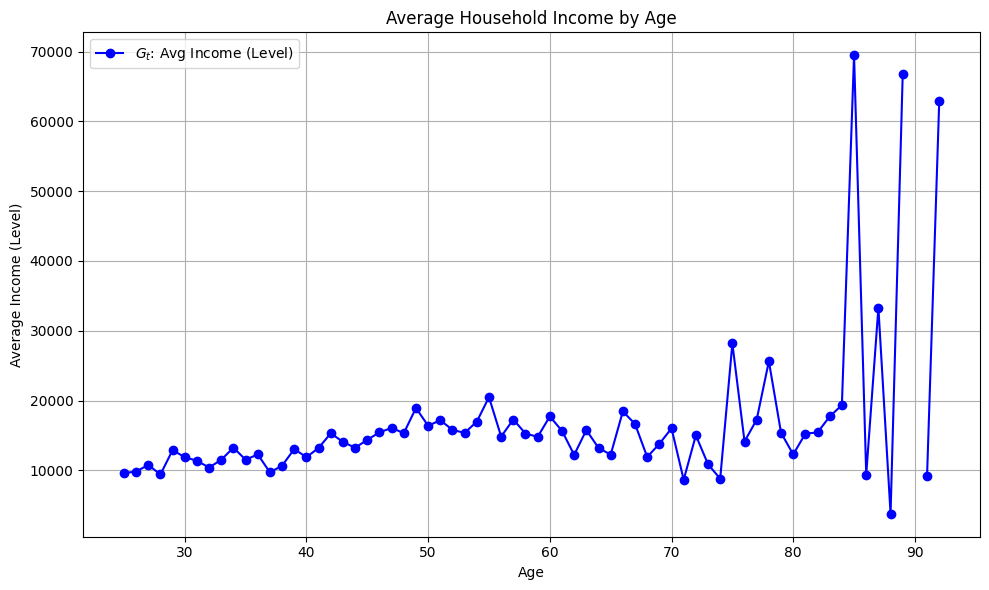

In [22]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  # Ensure pandas is imported

# Rename 'm1ac5' to 'age'
final_data.rename(columns={"m1ac5": "age"}, inplace=True)

# Replace 0 with NaN in income, then take log
final_data["log_income"] = np.log(final_data["total_household_income"].replace(0, np.nan))

# Group by age and calculate the mean of log income
log_income_by_age = final_data.groupby("age")["log_income"].mean()

# Convert back from log to level income
Gt = np.exp(log_income_by_age)

print(Gt)

# Compute log income (log to handle zeros safely by replacing with NaN)
final_data["log_income"] = np.log(final_data["total_household_income"].replace(0, np.nan))

income = final_data.groupby("age")["total_household_income"].mean().reset_index()
income.columns = ["age", "Log Income"]

income["Gt"] = np.exp(income["Log Income"])
income

# Plotting Gt
plt.figure(figsize=(10, 6))
plt.plot(Gt.index, Gt.values, marker='o', linestyle='-', color='b', label=r'$G_t$: Avg Income (Level)')
plt.title("Average Household Income by Age")
plt.xlabel("Age")
plt.ylabel("Average Income (Level)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [23]:
import numpy as np
import pandas as pd

# Giả sử bạn đã có log_income_by_age và Gt
log_income_by_age = final_data.groupby("age")["log_income"].mean()
Gt = np.exp(log_income_by_age)

# Đưa về DataFrame để dễ xuất ra CSV
gt_df = pd.DataFrame({
    "age": Gt.index,
    "Gt": Gt.values
})

# Xuất ra CSV
gt_df.to_csv("gt_by_age.csv", index=False)


In [24]:
import pandas as pd

# Load data
data4a = pd.read_csv("muc4a.csv")

# Convert relevant columns to numeric and fill NaN values with 0
cols_work = ['m4ac6', 'm4ac7', 'm4ac8', 'm4ac16', 'm4ac17', 'm4ac18']
data4a[cols_work] = data4a[cols_work].apply(pd.to_numeric, errors='coerce').fillna(0)

# Calculate total working hours for each individual
data4a['total_work_hours'] = (data4a['m4ac6'] * data4a['m4ac7'] * data4a['m4ac8'] +
                              data4a['m4ac16'] * data4a['m4ac17'] * data4a['m4ac18'])

# Filter for individuals with positive working hours
data4a = data4a[data4a['total_work_hours'] > 0]

# Create a new column for individual work hours
data4a['individual_work_hours'] = data4a['total_work_hours']

# Now, group by household and calculate total working hours per household
household_work_hours = data4a.groupby(['tinh', 'huyen', 'xa', 'diaban', 'hoso'])['individual_work_hours'].sum().reset_index()
household_work_hours.rename(columns={'individual_work_hours': 'household_total_work_hours'}, inplace=True)

# Count the number of individuals in each household (this will be used to calculate avg_work_hours)
household_individuals = data4a.groupby(['tinh', 'huyen', 'xa', 'diaban', 'hoso'])['matv'].count().reset_index()
household_individuals.rename(columns={'matv': 'num_of_individuals'}, inplace=True)

# Merge household working hours and individual count
data4a = pd.merge(household_work_hours, household_individuals, on=['tinh', 'huyen', 'xa', 'diaban', 'hoso'], how='left')

# Calculate average working hours per household
data4a['avg_household_work_hours'] = data4a['household_total_work_hours'] / data4a['num_of_individuals']

# Select required columns and remove duplicates (this will give you one row per household)
data4a = data4a[['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'household_total_work_hours', 'avg_household_work_hours']].drop_duplicates()

# Fill remaining NaN values
data4a.fillna(0, inplace=True)

# Preview the final dataframe
print(data4a)


      tinh  huyen    xa  diaban  hoso  household_total_work_hours  avg_household_work_hours
0      101      1   3.0       1    13                      2496.0               2496.000000
1      101      1   3.0       1    14                      4320.0               2160.000000
2      101      1   3.0       1    15                      3696.0               1848.000000
3      101      1   9.0      19    15                      3000.0               1500.000000
4      101      1   9.0      19    19                      2208.0               2208.000000
...    ...    ...   ...     ...   ...                         ...                       ...
8890   823     13  12.0      25    15                      4060.0               1353.333333
8891   823     13  12.0      25    19                      1800.0               1800.000000
8892   823     13  17.0       1    13                      3312.0               1104.000000
8893   823     13  17.0       1    14                      7560.0               

In [25]:
import pandas as pd

# Load data
muc4a = pd.read_csv("muc4a.csv")

# Create household size column
muc4a['household_size'] = muc4a.groupby(['tinh', 'huyen', 'xa', 'diaban', 'hoso'])['matv'].transform('max')

# Select the required columns
columns = ['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'matv', 'm4ac6', 'm4ac7', 'm4ac8', 'm4ac11', 
           'm4ac12f', 'm4ac16', 'm4ac17', 'm4ac18', 'm4ac21', 'm4ac22f', 'm4ac25', 'household_size']
muc4aa = muc4a[columns].copy()

# Define income-related columns and filter existing ones
income_cols = ['m4ac11', 'm4ac12f', 'm4ac21', 'm4ac22f', 'm4ac25']
income_cols = [col for col in income_cols if col in muc4aa.columns]

# Compute individual income (handle missing columns)
muc4aa['individual_income'] = muc4aa[income_cols].sum(axis=1) if income_cols else 0

# Compute total household income
household_income = muc4aa.groupby(['tinh', 'huyen', 'xa', 'diaban', 'hoso'])['individual_income'].sum().reset_index()
household_income.rename(columns={'individual_income': 'total_household_income'}, inplace=True)

# Merge total household income
muc4aa = muc4aa.merge(household_income, on=['tinh', 'huyen', 'xa', 'diaban', 'hoso'], how='left')

# If we have a duplicate column, drop the old column to avoid confusion
if 'individual_income_total' in muc4aa.columns:
    muc4aa.drop(columns=['individual_income'], inplace=True)

# Rename merged income column to avoid ambiguity
muc4aa.rename(columns={'individual_income_total': 'individual_income'}, inplace=True)

# Filter out individuals with no income (individual_income <= 0)
muc4aa = muc4aa[muc4aa['individual_income'] > 0]

# Create a new column 'working_individuals' to count the number of working individuals per household
# Group by household and count the number of non-zero income individuals (working individuals)
muc4aa['working_individuals'] = muc4aa.groupby(['tinh', 'huyen', 'xa', 'diaban', 'hoso'])['matv'].transform('count')

# If you want to keep 'household_size' as the number of working individuals per household, calculate that based on 'working_individuals'
muc4aa['working_household_size'] = muc4aa.groupby(['tinh', 'huyen', 'xa', 'diaban', 'hoso'])['working_individuals'].transform('max')

# Define work-related columns and filter existing ones
work_cols = ['m4ac6', 'm4ac7', 'm4ac8', 'm4ac16', 'm4ac17', 'm4ac18']
work_cols = [col for col in work_cols if col in muc4aa.columns]

# Fill NaN values with 0 to avoid multiplication errors
muc4aa[work_cols] = muc4aa[work_cols].fillna(0)

# Compute total working hours for first and secondary jobs
muc4aa['total_hours_first_job'] = muc4aa['m4ac6'] * muc4aa['m4ac7'] * muc4aa['m4ac8']
muc4aa['total_hours_second_job'] = muc4aa['m4ac16'] * muc4aa['m4ac17'] * muc4aa['m4ac18']

# Compute total individual working hours
muc4aa['individual_work_hours'] = muc4aa['total_hours_first_job'] + muc4aa['total_hours_second_job']

# Filter out individuals with no working hour (individual_work_hours <= 0)
muc4aa = muc4aa[muc4aa['individual_work_hours'] > 0]

# Compute total household working hours
household_work_hours = muc4aa.groupby(['tinh', 'huyen', 'xa', 'diaban', 'hoso'])['individual_work_hours'].sum().reset_index()
household_work_hours.rename(columns={'individual_work_hours': 'total_household_work_hours'}, inplace=True)

# Merge total household working hours
muc4aa = muc4aa.merge(household_work_hours, on=['tinh', 'huyen', 'xa', 'diaban', 'hoso'], how='left')

# Compute the average working hours by dividing 'total_household_work_hours' by 'working_household_size'
muc4aa['average_work_hours'] = muc4aa['total_household_work_hours'] / muc4aa['working_household_size']

# Remove duplicates from the muc4aa dataframe
muc4aa.drop_duplicates(subset=['tinh', 'huyen', 'xa', 'diaban', 'hoso'], keep='first', inplace=True)

# Fill any remaining NaN values
muc4aa.fillna(0, inplace=True)

# Select the required columns to keep
cols = ['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'individual_income', 'total_household_income', 'working_household_size', 
        'individual_work_hours', 'total_household_work_hours', 'average_work_hours']
muc4aa = muc4aa[cols]

# Preview the final dataframe
print(muc4aa)


      tinh  huyen    xa  diaban  hoso  individual_income  total_household_income  working_household_size  individual_work_hours  total_household_work_hours  average_work_hours
0      101      1   3.0       1    13            18550.0                 18550.0                       1                 2496.0                      2496.0         2496.000000
1      101      1   3.0       1    14            42351.0                 56468.0                       2                 2496.0                      4320.0         2160.000000
3      101      1   3.0       1    15            42351.0                 42351.0                       1                 2496.0                      2496.0         2496.000000
4      101      1   9.0      19    19            22040.0                 22040.0                       1                 2208.0                      2208.0         2208.000000
5      101      1   9.0      19    20            33979.0                 47203.0                       2                

In [26]:
# Merge the new columns from muc4aa into final_data
final_data = final_data.merge(muc4aa[['tinh', 'huyen', 'xa', 'diaban', 'hoso', 
                                      'individual_income', 'total_household_income', 
                                      'working_household_size', 'individual_work_hours', 
                                      'total_household_work_hours', 'average_work_hours']], 
                              on=['tinh', 'huyen', 'xa', 'diaban', 'hoso'], 
                              how='left')

# Drop rows with NaN values
final_data.dropna(inplace=True)

# Hiển thị kết quả
print(final_data)

# Lưu dữ liệu đã cập nhật
final_data.to_csv("final_output_new.csv", index=False)


      tinh  hoso  diaban  huyen  xa   m7c32   m7c36  m7c39  elec_water_garbage  matv  m1ac2  m1ac3  age  total_household_income_x  fam_size  household_consumption     DIY  household_consumption2   m5a2c6  m5a2c10  total_food_consumption   m5b1c4  m5b1c5  total_nonfood_consumption  m5b2c2_x  m5b2c3_x  total_annual_consumption_x  m5b2c2_y  m5b2c3_y  total_annual_consumption_y  other_spending  wealth_fixed  total_wealth  log_income  individual_income  total_household_income_y  working_household_size  individual_work_hours  total_household_work_hours  average_work_hours
0      101    14       1      1   3   720.0  3000.0  108.0              3828.0     1      1      1   64                   56468.0         3                 3473.3  1146.0                  4619.3  36904.7      0.0                 36904.7  21586.0     0.0                    21586.0   18950.0       0.0                     18950.0   18950.0       0.0                     18950.0          8150.0           0.0           0.0   10.9

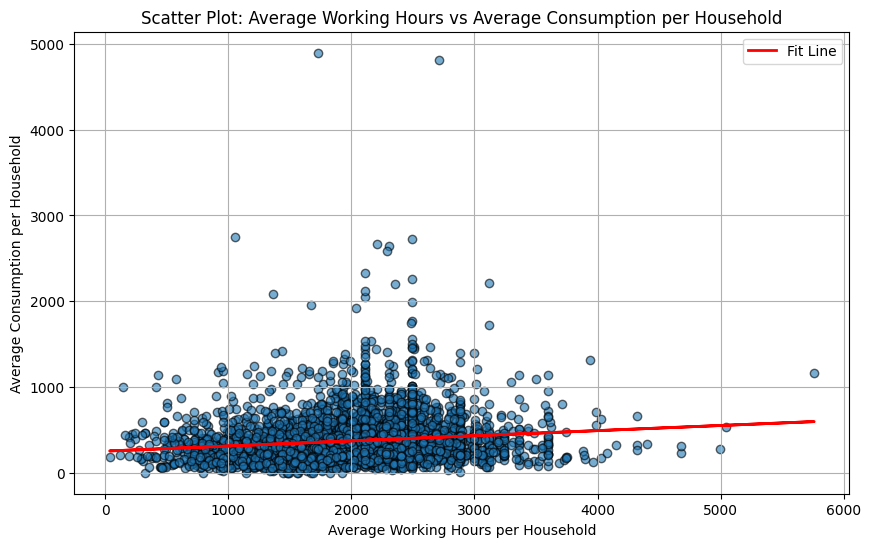

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate average consumption per household
final_data['average_consumption'] = final_data['household_consumption2'] / final_data['fam_size']

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(final_data['average_work_hours'], final_data['average_consumption'], alpha=0.6, edgecolor='k')

# Fit a linear regression line
x = final_data['average_work_hours']
y = final_data['average_consumption']
slope, intercept = np.polyfit(x, y, 1)
fit_line = slope * x + intercept
plt.plot(x, fit_line, color='red', linewidth=2, label='Fit Line')

plt.title('Scatter Plot: Average Working Hours vs Average Consumption per Household')
plt.xlabel('Average Working Hours per Household')
plt.ylabel('Average Consumption per Household')
plt.legend()
plt.grid(True)
plt.show()
